Shubham Kothiya
Classification with deep learning

In [ ]:
"""
Import necessary libraries for data manipulation, machine learning, and deep learning
"""
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
from wandb.integration.keras import WandbCallback

In [ ]:
"""
Initialize Weights & Biases for experiment tracking
"""
wandb.init(project="deep-learning-classification")

"""
Load the Wine Quality dataset from UCI Machine Learning Repository
"""
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=';')

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rishikeshavlal-patel (rishikeshavlal-patel-student) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [ ]:
"""
Categorize wine quality into three classes: Low, Medium, and High
"""
def categorize_quality(quality):
    if quality <= 4:
        return 0  # Low quality
    elif quality <= 6:
        return 1  # Medium quality
    else:
        return 2  # High quality

df['quality'] = df['quality'].apply(categorize_quality)

In [ ]:
"""
Split dataset into features (X) and target labels (y)
"""
X = df.drop(columns=['quality'])
y = df['quality']

"""
Encode target labels into numerical format
"""
encoder = LabelEncoder()
y = encoder.fit_transform(y)

"""
Split dataset into training and test sets
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

"""
Standardize feature values to improve model performance
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
"""
Define a Neural Network model with three layers
"""
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

"""
Compile the model using Adam optimizer and sparse categorical cross-entropy loss
"""
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
"""
Train the model and log training progress with Weights & Biases

"""
from wandb.integration.keras import WandbCallback

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test),
                    callbacks=[WandbCallback(save_model=False, save_graph=False)])



Epoch 1/50


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2931 - loss: 1.2145 - val_accuracy: 0.8062 - val_loss: 0.8681
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8044 - loss: 0.8101 - val_accuracy: 0.8250 - val_loss: 0.6545
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8177 - loss: 0.6150 - val_accuracy: 0.8250 - val_loss: 0.5693
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8339 - loss: 0.5271 - val_accuracy: 0.8344 - val_loss: 0.5290
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8219 - loss: 0.5329 - val_accuracy: 0.8344 - val_loss: 0.5033
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8423 - loss: 0.4723 - val_accuracy: 0.8375 - val_loss: 0.4920
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8260 - loss: 0.4858 - val_accuracy: 0.8438 - val_loss: 0.4805
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8381 - loss: 0.4556 - val_accuracy: 0.8469 - val_loss: 0.4688


In [ ]:
"""
Evaluate the model on the test set
"""
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

"""
Generate predictions for the test set
"""
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

"""
Display classification report including precision, recall, and F1-score
"""
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8382 - loss: 0.4412

Test Accuracy: 0.8406
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.87      0.95      0.91       264
           2       0.58      0.44      0.50        43

    accuracy                           0.84       320
   macro avg       0.48      0.46      0.47       320
weighted avg       0.80      0.84      0.82       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


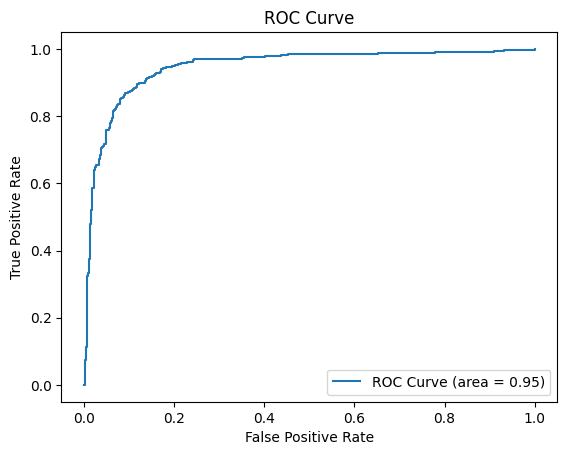

In [ ]:
"""
Plot ROC Curve
"""
plt.figure()
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
from sklearn.metrics import roc_auc_score
overall_roc_auc = roc_auc_score(y_test_bin, y_pred_probs, multi_class='ovr')
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

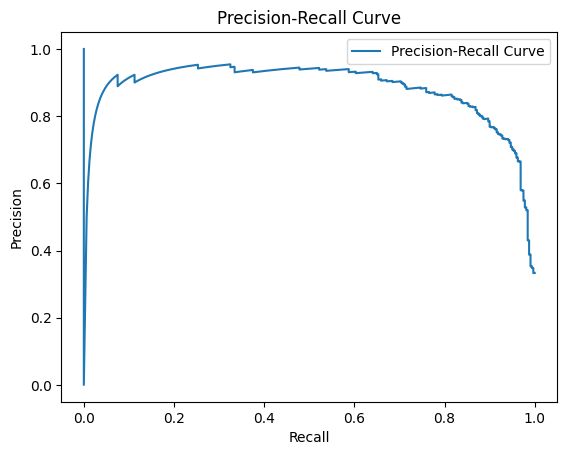

In [ ]:
"""
Plot Precision-Recall Curve
"""
plt.figure()
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test_bin, y_pred_probs, average='macro')
precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_probs.ravel())
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


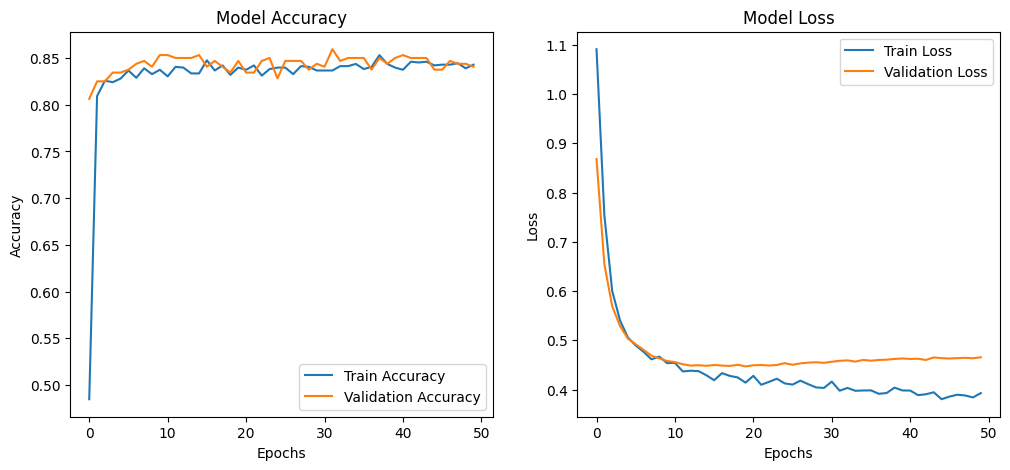

In [ ]:
"""
Visualize training history for accuracy and loss
"""
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

Basic Model Architecture:


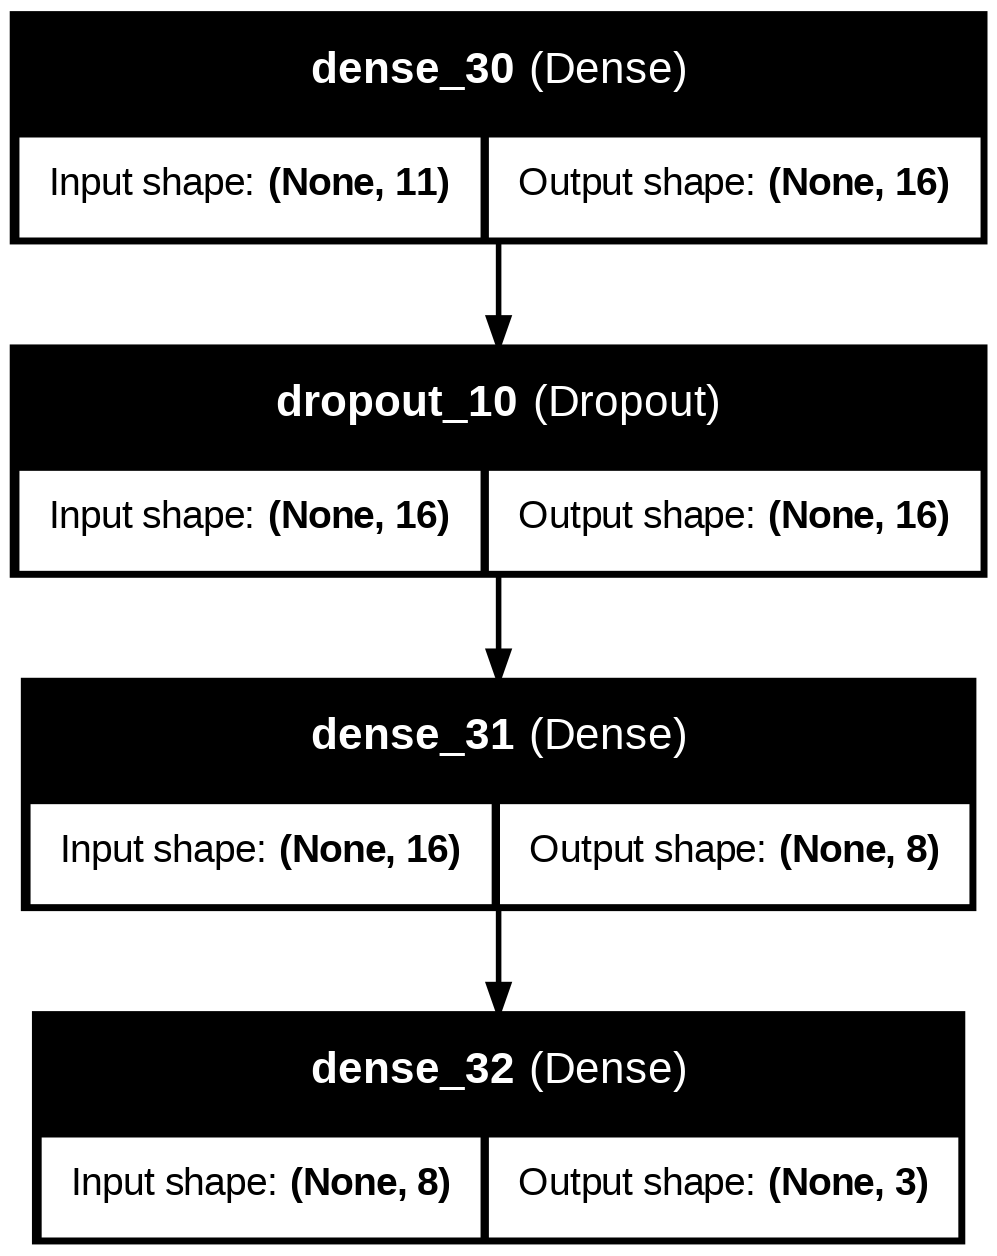


Detailed Model Architecture:


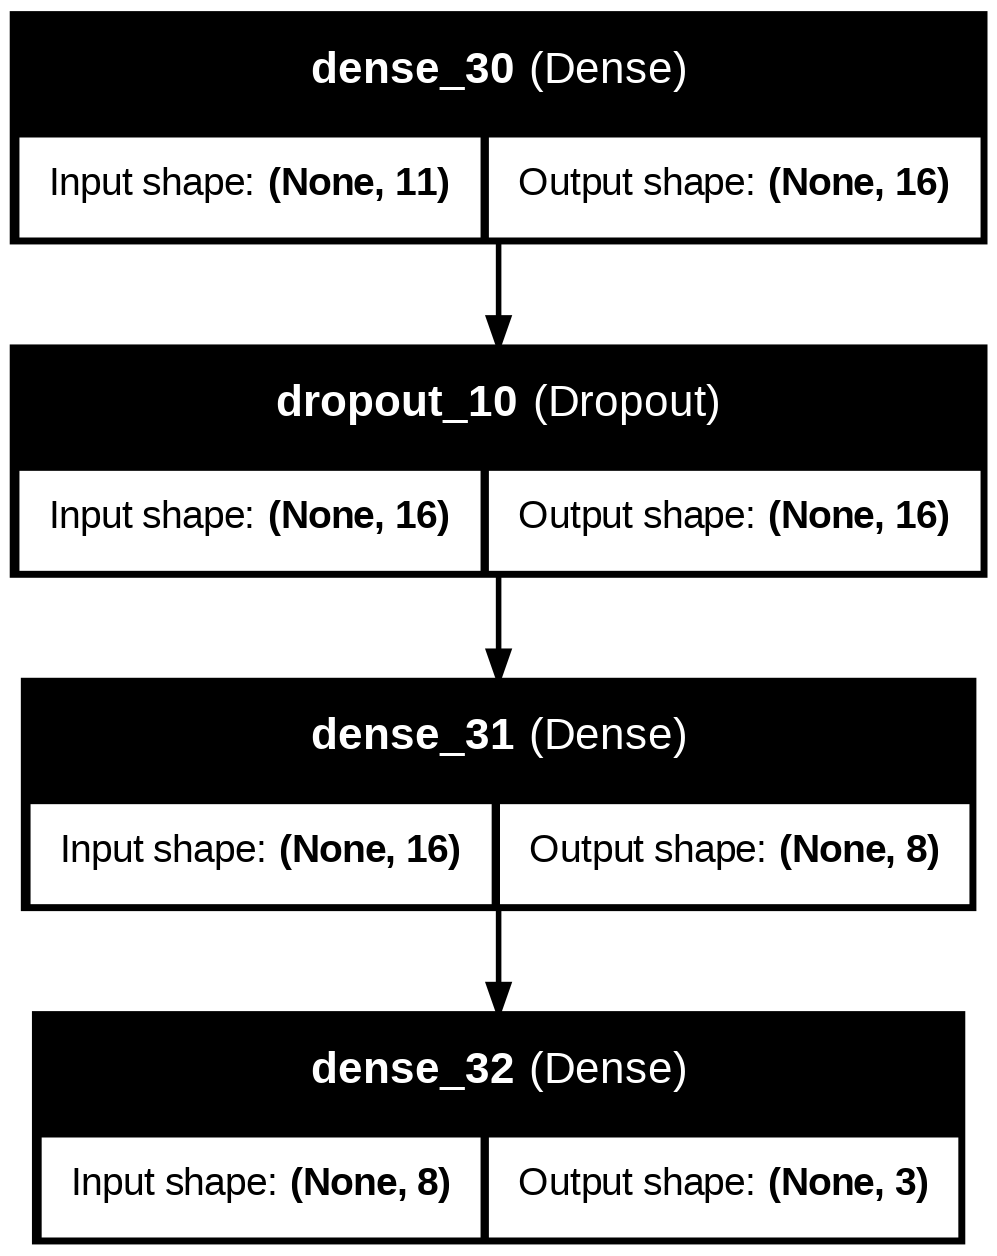


Model Summary:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,067 (4.17 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 712 (2.79 KB)

In [ ]:
"""
Visualize model architecture
"""
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
plot_model(model, to_file='model_detailed.png', show_shapes=True, show_layer_names=True, expand_nested=True)

print("Basic Model Architecture:")
display(Image('model_architecture.png'))

print("\nDetailed Model Architecture:")
display(Image('model_detailed.png'))

"""
Display model summary
"""
print("\nModel Summary:")
model.summary()

In [ ]:
"""
Log final test accuracy to Weights & Biases
"""
import time
time.sleep(2)
wandb.log({"Test Accuracy": test_acc, "Test Loss": test_loss})
wandb.finish()



Test Accuracy,▁▁▁
Test Loss,▁▁
accuracy,▁▇██████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▃▃▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▄▅▆▇▆█████▆▇▆▅▅▇█▄▇▇▆▇▆▇███▆▇████▆▆▇▇▆
val_loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Test Accuracy,0.84062
Test Loss,0.46552
accuracy,0.84285
best_epoch,19
